# Respostas
## 1)
- a) Sim. Mas, apenas para algumas doenças, mortalidade infantil, pneumonia e tuberculose tiveram queda. As demais ou tiveram leve aumento, como nas doenças de coração, ou permaneceram estáveis.
- b)  Mortalidade infantil, pneumonia. Houve queda na tuberculose. Mas, não tão expressiva quanto as outras duas. 
- c) Há chances de que dentro dessa amostra não seja possível observar os efeitos da introdução da sulfa. Pois, mortalidade materna já estava em tendência de baixa. Pneumonia que é uma doença tratável não possui no gráfico uma redução considerável e a escarlatina se manteve estável.

## 2)
- Escarlatina, pneumonia e tuberculose. O resultado foi que após 1937 as 3 doenças que são tratáveis ficaram com sinal negativo. Mas, diabetas e câncer, apesar de não tratável, apresentaram também resultado negativo.    

## 3)
- Sim. Pois `C(is_pos37)[T.1]:C(treatment)[T.1] = -0.4436` apresentando coeficiente negativo e nível de significância rejeitando à 1%
- Há uma grande variação do coeficiente associado a cada estado. Mas, mesmo assim não há grande impacto do efeito da sulfa.
- Os resultados mudam. Os coeficientes das doenças tratáveis passam a ficar menores `C(disease)[T.2] -25.2843` `C(disease)[T.3] -16.7625` 


In [1]:
import pandas as pd
import matplotlib.pyplot as graph
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
graph.rcParams['figure.figsize'] = (15, 6)

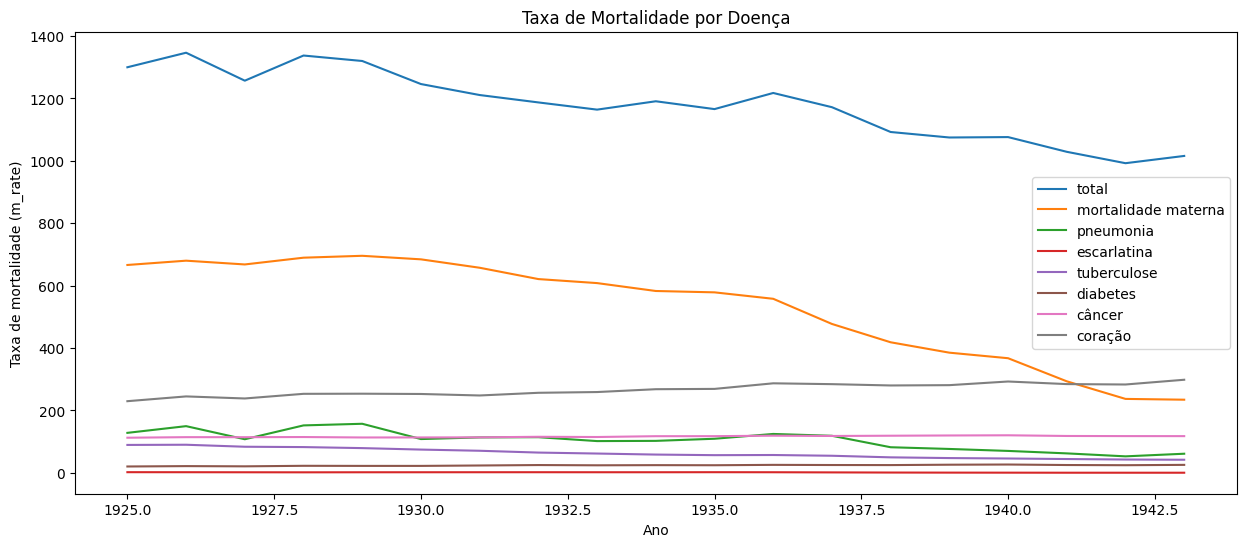

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

country_df = pd.read_csv('datasets/file1.csv')

country_df.set_index('year', inplace=True)
diseases = country_df['disease'].unique()

for disease in diseases:
    df_doenca = country_df[country_df['disease'] == disease]
    serie_m_rate = df_doenca['m_rate']
    plt.plot(serie_m_rate, label=disease)

plt.xlabel('Ano')
plt.ylabel('Taxa de mortalidade (m_rate)')
plt.title('Taxa de Mortalidade por Doença')
plt.legend() 

plt.show()

In [4]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

data = pd.read_csv('datasets/file1.csv')

data['is_pos37'] = (data['year'] >= 1937).astype(int)
data = data.drop(data[data['m_rate'] == 0].index)
data['log_m_rate'] = np.log(data['m_rate'])

m_rate_total = data.loc[data['disease'] == 'total', 'm_rate']

modelo_dd = smf.ols('log_m_rate ~ C(year) + C(disease) + C(is_pos37) ', data=data).fit()

with open('resumo_modelo_1.txt', 'w') as f:
    f.write(modelo_dd.summary().as_text())

print(modelo_dd.summary())

                            OLS Regression Results                            
Dep. Variable:             log_m_rate   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     332.8
Date:                Wed, 29 Nov 2023   Prob (F-statistic):          7.85e-103
Time:                        18:17:36   Log-Likelihood:                -2.1114
No. Observations:                 152   AIC:                             56.22
Df Residuals:                     126   BIC:                             134.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [5]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

data = pd.read_csv('datasets/file2.csv')
data = data[(data['year'] >= 1935) & (data['year'] <= 1939)]

data['treatment'] = data['disease'].isin([1, 2, 3]).astype(int)

data = data.drop(data[data['m_rate'] == 0].index)
data['log_m_rate'] = np.log(data['m_rate'])

data['is_pos37'] = (data['year'] >= 1937).astype(int)

modelo_dd = smf.ols('log_m_rate ~ treatment + C(year) + C(disease) + (C(is_pos37) * C(treatment)) + C(statenum)', data=data).fit()

with open('resumo_modelo_did_2.txt', 'w') as f:
    f.write(modelo_dd.summary().as_text())

print(modelo_dd.summary())

                            OLS Regression Results                            
Dep. Variable:             log_m_rate   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     3831.
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        18:17:36   Log-Likelihood:                -1014.2
No. Observations:                1677   AIC:                             2146.
Df Residuals:                    1618   BIC:                             2467.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [6]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

data = pd.read_csv('datasets/file2.csv')
data = data[(data['year'] >= 1935) & (data['year'] <= 1939)]

data['treatment'] = data['disease'].isin([1, 2, 3]).astype(int)

data = data.drop(data[data['m_rate'] == 0].index)
data['log_m_rate'] = np.log(data['m_rate'])
data['delta_log_m_rate'] = data.groupby('statenum')['log_m_rate'].diff()
data['is_pos37'] = (data['year'] >= 1937).astype(int)

modelo_dd_growth = smf.ols('delta_log_m_rate ~ treatment + C(year) + C(disease) + (C(is_pos37) * C(treatment)) + C(statenum)', data=data).fit()

with open('resumo_modelo_did_growth.txt', 'w') as f:
    f.write(modelo_dd_growth.summary().as_text())

print(modelo_dd_growth.summary())

                            OLS Regression Results                            
Dep. Variable:       delta_log_m_rate   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     2704.
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        18:17:36   Log-Likelihood:                -1717.5
No. Observations:                1629   AIC:                             3553.
Df Residuals:                    1570   BIC:                             3871.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte